In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from my_helpers import *
import viz

In [6]:
R = 1000
C = .201*si.µ
L = 100*si.m
V = 5

Fr = get_resonant_frequency(C,L)
Fr = round(Fr, 1)
Fr

1122.6

In [9]:
freqs = [
    300,
    500,
    700,
    1000,
    Fr,
    2000,
    3000,
    5000
]

In [32]:
Vr_observed = [
    1.9,
    3.1,
    4.1,
    4.94,
    5,
    3.8,
    2.6,
    1.6,
    ]

In [16]:
freqs_theory = np.linspace(min(freqs),max(freqs),100)

I need to determine the expected voltage across frequencies

In [27]:
voltages = []
for freq in freqs_theory:
    Xl = get_inductive_reactance(L,freq)
    Xc = get_capacitive_reactance(C,freq)
    Z = sum([R,Xl,Xc])
    V_out = V*(R/Z)
    voltages.append(abs(V_out))


Text(0.5, 1.0, '$V_R$ at varying AC frequencies')

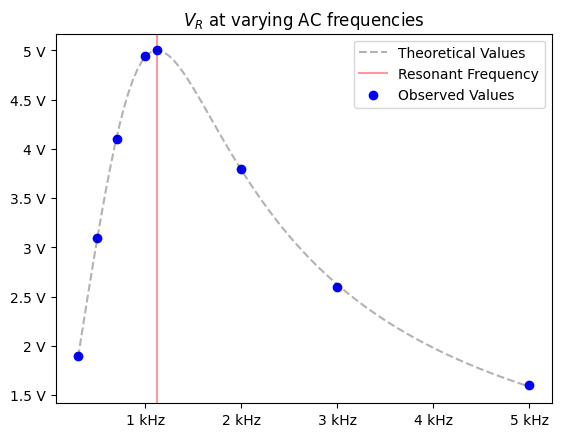

In [50]:
fig,ax = plt.subplots()
ax.plot(freqs_theory, voltages, color='black', linestyle='--', alpha=0.3, label="Theoretical Values")
ax.axvline(Fr,color='red',linestyle='-',alpha=0.4,zorder=-1,label='Resonant Frequency')
ax.scatter(freqs,Vr_observed, color='b', label="Observed Values")
ax.xaxis.set_major_formatter(ticker.EngFormatter('Hz'))
ax.yaxis.set_major_formatter(ticker.EngFormatter('V'))
ax.legend()
ax.set_title("$V_R$ at varying AC frequencies")